In [1]:
#引入包
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from scipy import interpolate
import math

<IPython.core.display.Javascript object>


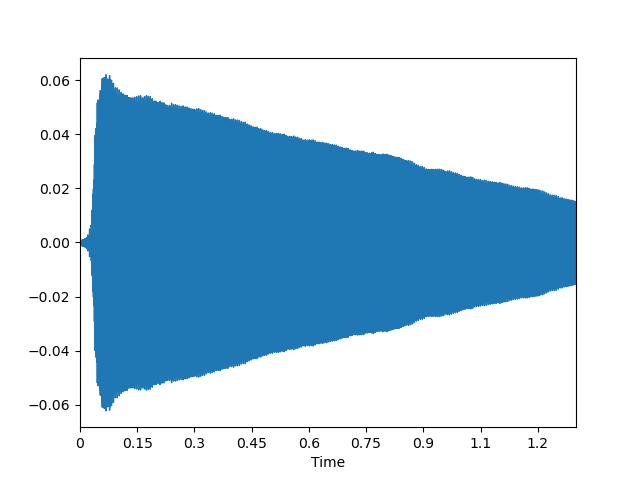

22050


In [15]:
whole,sr = librosa.load("0.wav");
%matplotlib notebook
plt.figure(1);
librosa.display.waveplot(whole,sr) #画出图像
ipd.Audio('0.wav') #播放音频
print(sr) #采样率

In [16]:
frame_length = 60; #分窗大小
hop_length = 1; #跳距
num =int((len(whole)-frame_length)/hop_length)+1 #y点数
print(num)
y = np.ones(num)
for i in range(num):
    y[i] = max(whole[hop_length*i:hop_length*i+frame_length]) #每隔hop_length的frame_length内最大值
t1=np.arange(whole.size)/sr   #原始点数
t2=np.arange(num)*hop_length/sr


28613


<IPython.core.display.Javascript object>


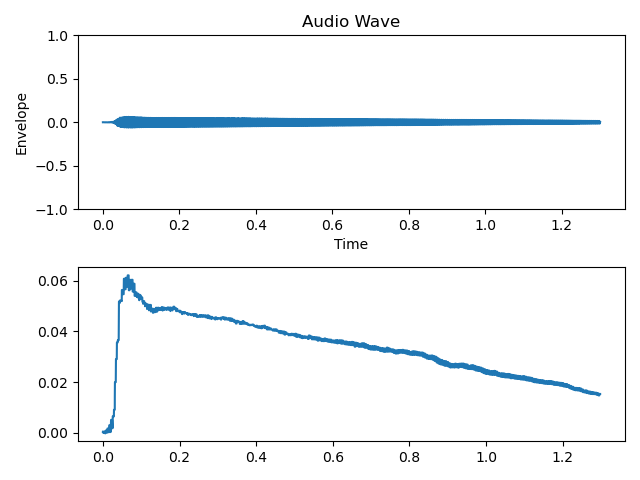

In [17]:
f,ax = plt.subplots(2)
li1, = ax[0].plot(t1, whole) #总音频图像
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1)) 
li2, = ax[1].plot(t2, y) #振幅包络
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Envelope',ylim=(-1,1)) 
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


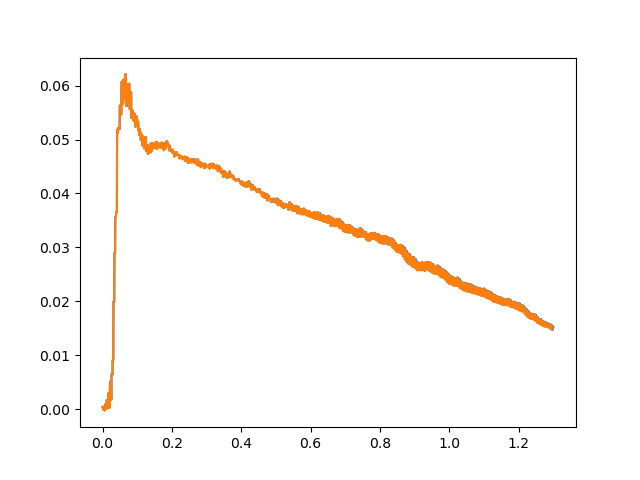

In [18]:
#还原
from scipy import interpolate
f = interpolate.interp1d(t2,y)
dnew = np.linspace(0,max(t2),len(whole))
ynew = f(dnew)
plt.figure(3)
plt.plot(t1,ynew)
plt.plot(t2,y)

<IPython.core.display.Javascript object>


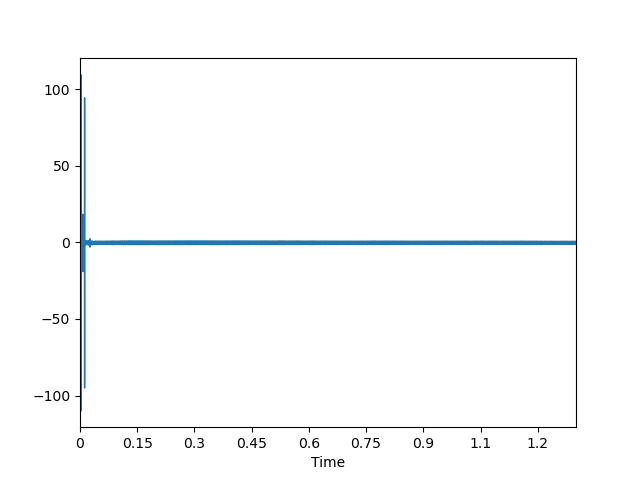

In [19]:
fin = whole/ynew
plt.figure(5)
librosa.display.waveplot(fin,sr)

In [20]:
ipd.Audio(fin,rate=sr)

In [28]:
ipd.Audio(whole,rate=sr)

In [14]:
#引入包
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from scipy import interpolate







def de_env(whole,sr):
    frame_length = 60; #分窗大小
    hop_length = 2; #跳距
    num =int((len(whole)-frame_length)/hop_length)+1 #y点数
    print(num)
    y = np.ones(num)
    for i in range(num):
        y[i] = max(whole[hop_length*i:hop_length*i+frame_length]) #每隔hop_length的frame_length内最大值
    t1=np.arange(whole.size)/sr   #原始点数
    t2=np.arange(num)*hop_length/sr
#     #画图
#     f,ax = plt.subplots(2)
#     li1, = ax[0].plot(t1, whole) #总音频图像
#     ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1)) 
#     li2, = ax[1].plot(t2, y) #振幅包络
#     ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Envelope',ylim=(-1,1)) 
#     plt.tight_layout()
#     plt.show()
    #还原
    from scipy import interpolate
    f = interpolate.interp1d(t2,y)
    dnew = np.linspace(0,max(t2),len(whole))
    ynew = f(dnew)
#     plt.figure(3)
#     plt.plot(t1,ynew)
#     plt.plot(t2,y)
    fin = whole/ynew
#     plt.figure(5)
#     librosa.display.waveplot(fin,sr)
    return fin

for i in range(36):
    whole,sr = librosa.load('./高音键笙 音源/'+str(i)+'.wav')
    fin = de_env(whole,sr)
    librosa.output.write_wav('./高音键笙 音源去包络/'+str(i)+'.wav', fin, sr,norm=False)





14307
15075
14819
7395
15587
16611
15075
16611
17378
18403
20707
23267
17891
16099
23779
17123
21987
19939
18147
18403
12771
16611
19427
16611
18403
22243
23779
19171
23011
21987
14563
19939
18914
19171
11491
17891
